In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(".."))
from pathlib import Path
from scripts.download_weather_data import fetch_nasa_power_weather
from scripts.plant_config import plant_config

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [3]:
# Read plant parameters from config file
config = plant_config

In [4]:
config

{'latitude': 48.14951,
 'longitude': 11.56999,
 'elevation': 516,
 'capacity_kwp': 3,
 'n_modules': 12,
 'module_area': 1.67,
 'tilt': 30,
 'azimuth': 200}

In [5]:
# Download weather data from NASA POWER API
parameters = ("T2M", "RH2M", "WS2M", "WD2M", "PS", "CLOUD_AMT")
df_weather = fetch_nasa_power_weather(
    latitude=config['latitude'],
    longitude=config['longitude'],
    parameters=parameters,
    start="20190101",
    end="20191231"
)


Requesting data from: https://power.larc.nasa.gov/api/temporal/hourly/point?parameters=T2M,RH2M,WS2M,WD2M,PS,CLOUD_AMT&community=RE&longitude=11.56999&latitude=48.14951&start=20190101&end=20191231&format=JSON&user=demo


In [6]:
df_weather.head()

,datetime,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
0,2019-01-01 12:00:00+00:00,0.68,99.13,1.32,267.8,95.87,0.6756
1,2019-01-01 12:00:00+00:00,0.70,97.21,3.28,276.3,95.06,0.9255
2,2019-01-01 12:00:00+00:00,0.86,96.11,3.48,269.5,95.08,0.8779
3,2019-01-01 12:00:00+00:00,0.95,95.51,3.58,263.1,95.10,0.8691
4,2019-01-01 12:00:00+00:00,0.99,95.51,3.57,260.3,95.14,0.8695


In [7]:
df_weather.shape

(8760, 7)

In [8]:
# Save the weather data to a CSV file
data_path = Path("../data")
file_name = "weather_data.csv"
df_weather.to_csv(data_path / file_name, index=False)

In [9]:
# Read CSV file for data exploration
df_weather = pd.read_csv(data_path / file_name, parse_dates=["datetime"])

In [10]:
df_weather.head()

,datetime,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
0,2019-01-01 12:00:00+00:00,0.68,99.13,1.32,267.8,95.87,0.6756
1,2019-01-01 12:00:00+00:00,0.70,97.21,3.28,276.3,95.06,0.9255
2,2019-01-01 12:00:00+00:00,0.86,96.11,3.48,269.5,95.08,0.8779
3,2019-01-01 12:00:00+00:00,0.95,95.51,3.58,263.1,95.10,0.8691
4,2019-01-01 12:00:00+00:00,0.99,95.51,3.57,260.3,95.14,0.8695


In [11]:
# Statistics of the weather data
df_weather.describe()


,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,9.110645,82.982162,1.197481,196.571473,94.403884,0.700163
std,8.521892,15.557283,0.711975,91.294034,0.844173,0.354706
min,-11.940000,28.170000,0.020000,0.000000,91.100000,0.000000
25%,2.390000,72.607500,0.730000,108.675000,93.930000,0.418100
50%,8.530000,88.445000,1.010000,224.500000,94.470000,0.896150
75%,15.750000,96.002500,1.490000,267.100000,94.900000,0.992200
max,35.440000,100.000000,5.450000,359.500000,96.570000,1.000000


In [12]:
# Check for missing values
df_weather.isnull().sum()

datetime                   0
temperature                0
humidity                   0
wind_speed                 0
wind_direction             0
mean_sea_level_pressure    0
cloudiness                 0
dtype: int64

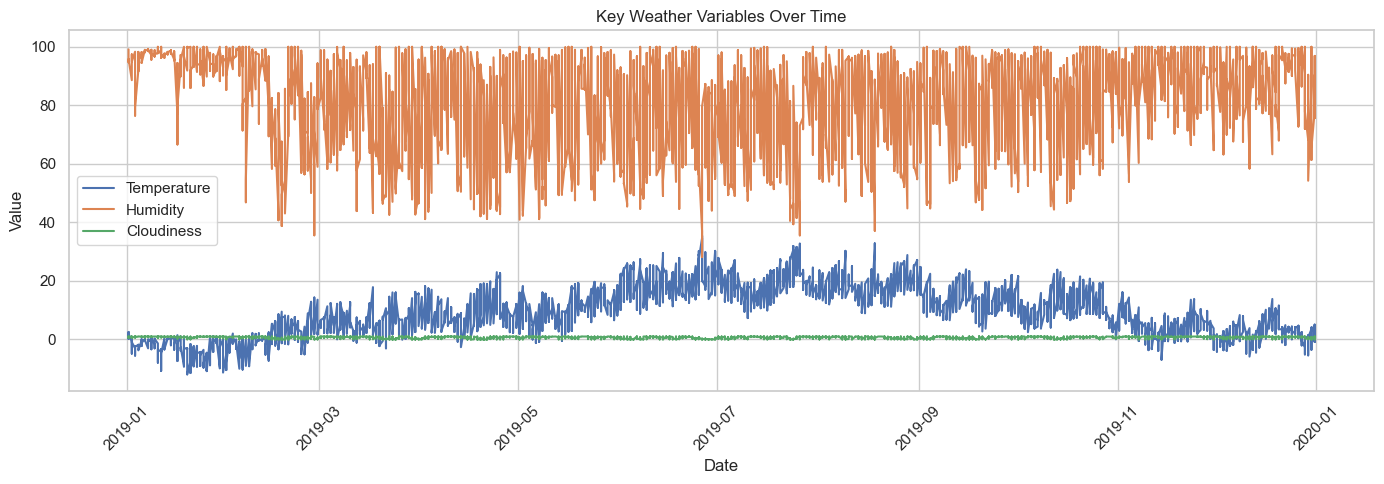

In [13]:
# Time series plot of temperature, humidity, and cloudiness (if available)
plt.figure(figsize=(14, 5))
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        plt.plot(df_weather["datetime"], df_weather[col], label=col.capitalize())
plt.legend()
plt.title("Key Weather Variables Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


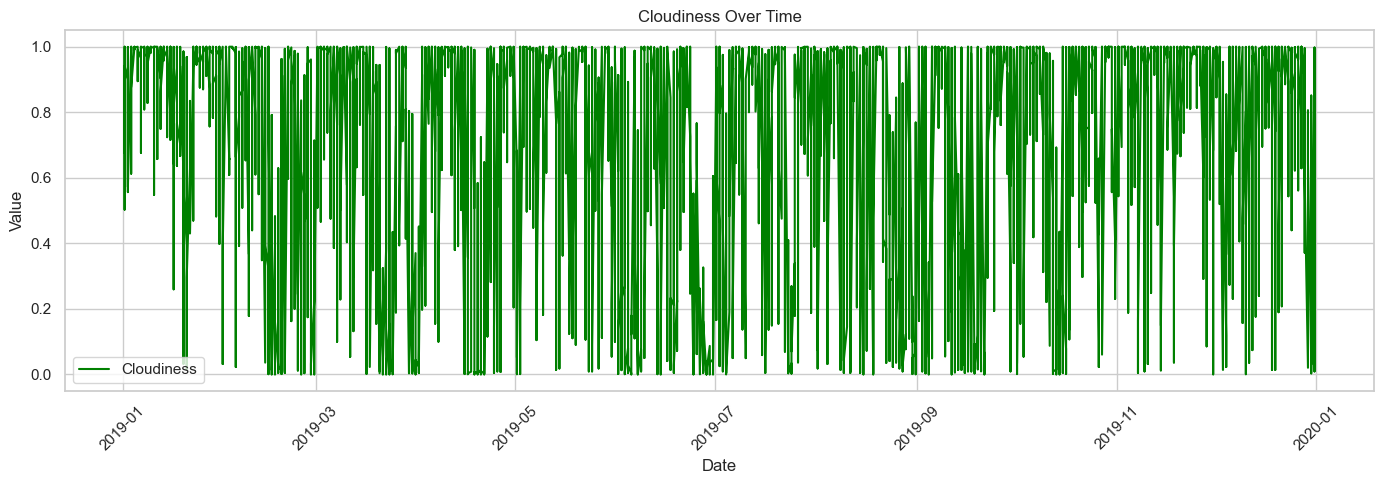

In [14]:
# Time series plot of temperature, humidity, and cloudiness (if available)
plt.figure(figsize=(14, 5))
plt.plot(df_weather["datetime"], df_weather["cloudiness"], label=col.capitalize(), color='green')
plt.legend()
plt.title("Cloudiness Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

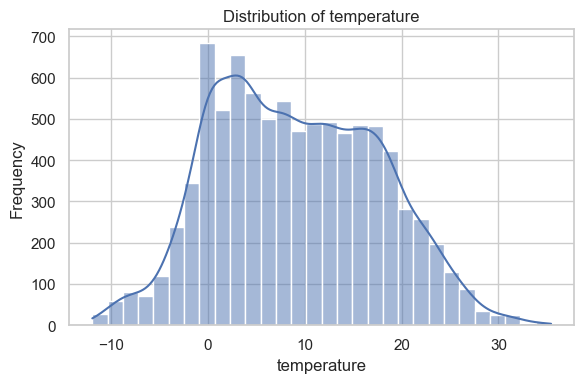

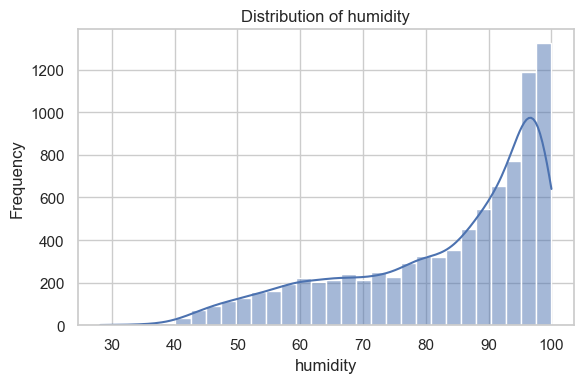

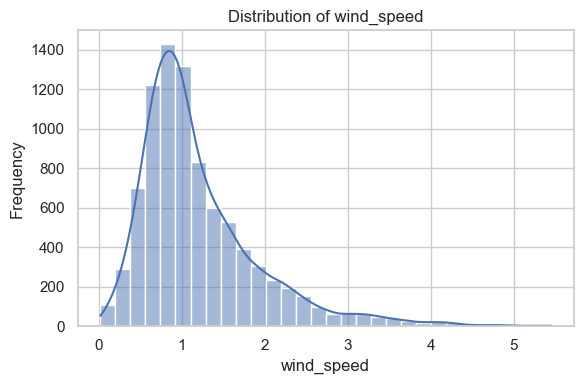

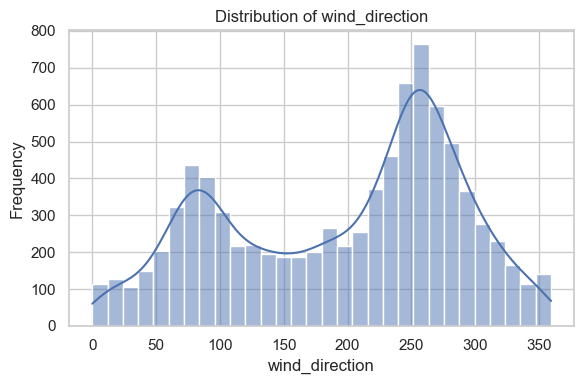

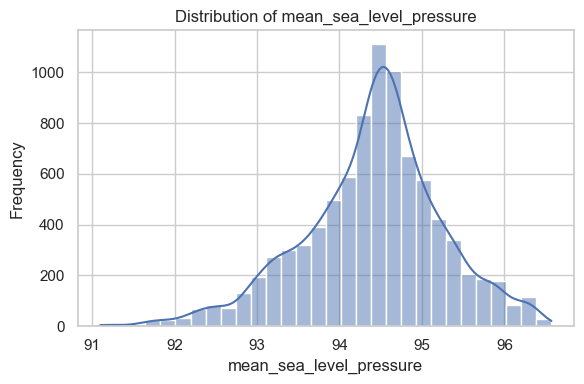

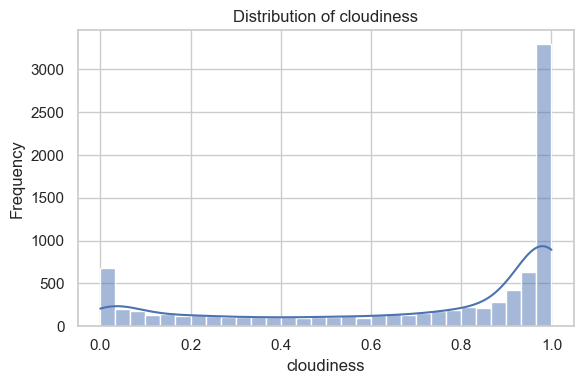

In [15]:
# Distribution plots for all numeric features
numeric_cols = df_weather.select_dtypes(include=["number"]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_weather[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

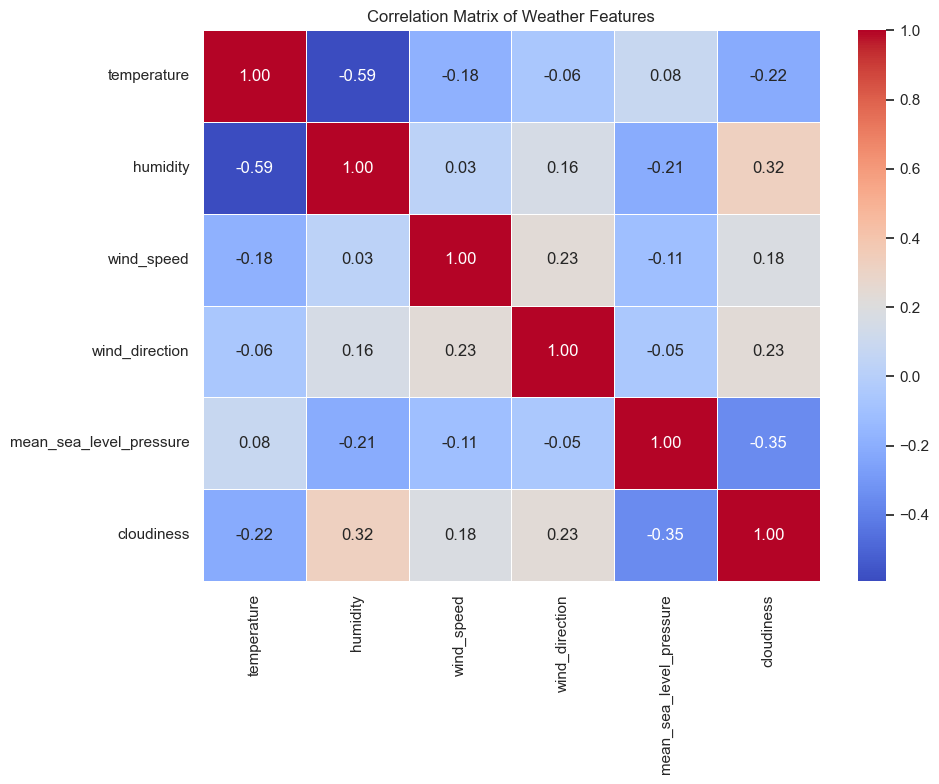

In [16]:
# Correlation matrix and heatmap (if >1 numeric columns)
if len(numeric_cols) > 1:
    corr_matrix = df_weather[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Weather Features")
    plt.tight_layout()
    plt.show()